KMEANS CLUSTERING

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [38]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [39]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


EXPLORATORY DATA ANALYSIS

In [40]:
df.shape

(200, 5)

In [41]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [42]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values

In [43]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [44]:
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])

In [45]:
df=df.drop(columns='CustomerID')

<Axes: xlabel='Gender', ylabel='count'>

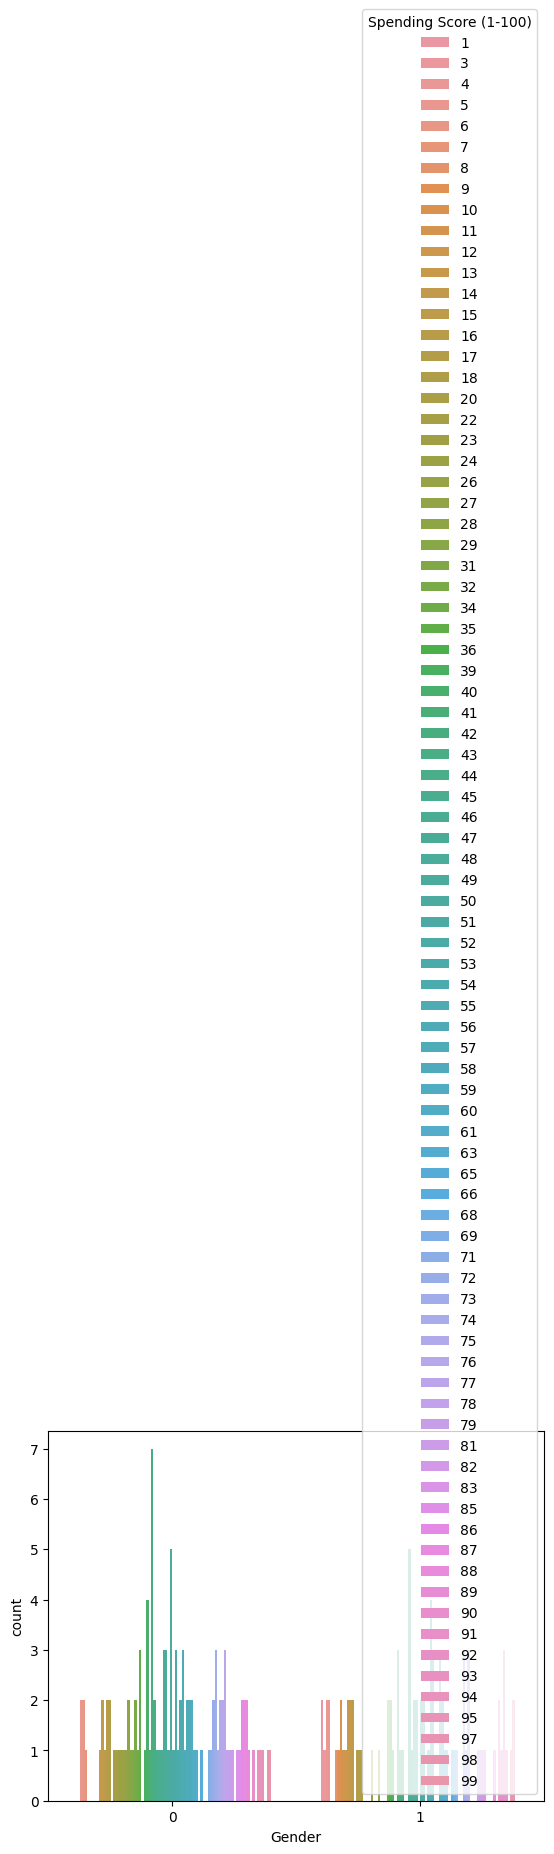

In [46]:
sns.countplot(x='Gender',hue="Spending Score (1-100)",data=df)


<Axes: >

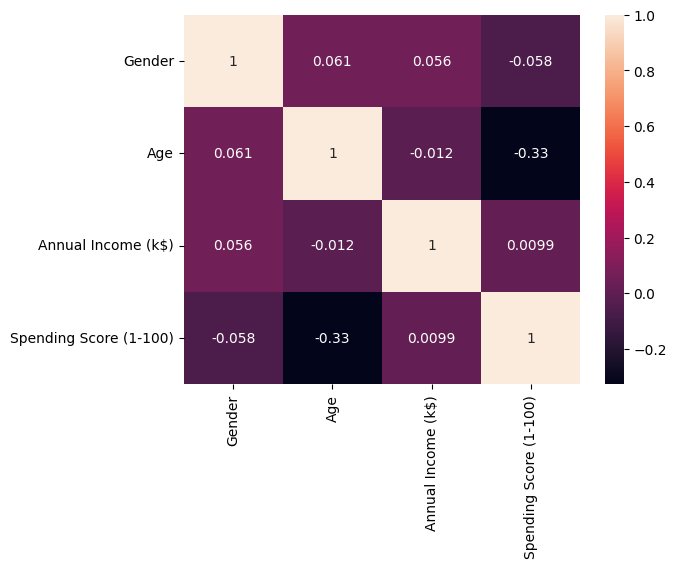

In [47]:
sns.heatmap(df.corr(),annot=True)

In [48]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [49]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0)

In [50]:
kmeans.fit(df_scaled)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [51]:
clusters=kmeans.predict(df)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [52]:
clusters

array([4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 3, 3, 4, 3, 4, 3, 4, 4, 3, 1, 4, 4, 4, 1, 1, 1, 1,
       1, 4, 3, 4, 4, 4, 1, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3,
       3, 4], dtype=int32)

In [54]:
df['labels']=kmeans.labels_

Visualization

Text(0.5, 1.0, 'Scatter Plot of Spending Score')

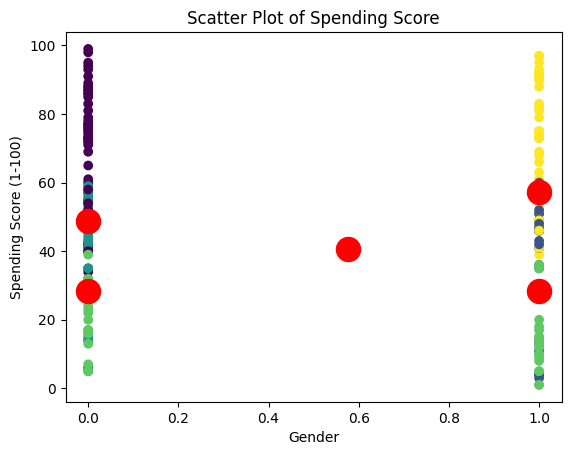

In [57]:
plt.scatter(df['Gender'],df['Spending Score (1-100)'],c=df['labels'])
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Spending Score')

Text(0.5, 1.0, 'Scatter Plot of Spending Score')

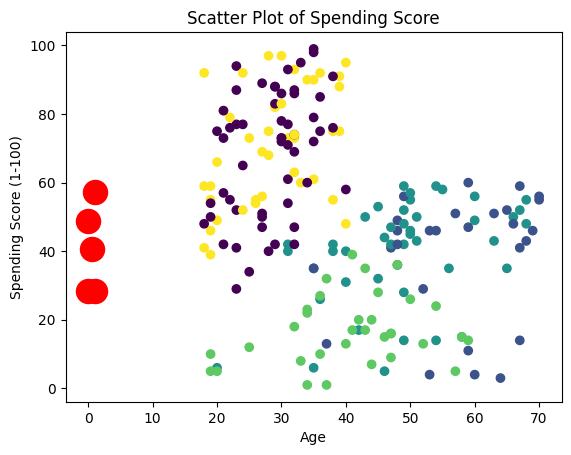

In [59]:
plt.scatter(df['Age'],df['Spending Score (1-100)'],c=df['labels'])
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Spending Score')

Thank you!